In [46]:
'''
#Project: Image Segmentation
1. HOWTO: Ugrade Pip Install in Python Terminal
PS H:\CODING\PROJECT_IST\ImageSegmentation> python.exe -m pip install --upgrade pip      

'''
#################### Use Terminal: Powershell #############################

#################### Define Libraries #####################################

import numpy as np #for linear algebra
import cv2
from matplotlib import pyplot as plt #for visualization only


################### PSEUDOCODE #############################################

'''
1. Look for K number of segments in the image
2. Take an image to a feature space
3. Make K random initial means
4. Create K clusters by assigning for each point to the nearest initial mean
5. Re-compute the cluster’s means
6. If changes in all K means is less than a certain threshold e, stop. Else, re-compute clusters’ means until this condition is met. 

'''


'\n1. Look for K number of segments in the image\n2. Take an image to a feature space\n3. Make K random initial means\n4. Create K clusters by assigning for each point to the nearest initial mean\n5. Re-compute the cluster’s means\n6. If changes in all K means is less than a certain threshold e, stop. Else, re-compute clusters’ means until this condition is met. \n\n'

In [47]:
############# ALGORITHM CLASS & FUNCTION DEFINITIONS ########################


def process_imageinto2D(current_image): #1. Process Image
    #1. Import/insert image, prepare image in intended RGB colorscale
    #2. Prepare image into 2D Array

    ############# 1. PROCESS/DISPLAY IMAGE ###################
    #Change color to RGB (from BGR)
    #HOWTO: cv2.cvtColor(image VARIABLE, cv2.COLOR__MODE To MODE)
    current_image = cv2.cvtColor(current_image, cv2.COLOR_BGR2RGB)

    #Displays Image
    #HOWTO: cv2.imshow("browser intended title", image VARIABLE)
    cv2.imshow("window_image", current_image)

    #Waits for user to press any key
    #(Necessary step: to avoid Python kernel from crashing)
    cv2.waitKey(0)

    #Closing all open windows
    cv2.destroyAllWindows()

    ########### 2. CONVERT 3D IMAGE TO 2D shape ###################
    #Image is a 3D array (height, width, channels), so need to flatten
    #image into 2D array, where:
        #Rows = pixels
        #Columns = RGB values

    # To apply k-means clustering --> need to reshape to 2D array

    #Get dimensions of 3D image (height, width, RGBA format model/channel)
    #print(current_image.shape)
    h, w, c = current_image.shape

    #Reshape image into 2D array of pixels and 2 color values (RGB)
    pixel_vals = current_image.reshape(h * w, c) #Result: 2D array with shape (height * width, 3)
    #where each row representes a pixel, and columns represent the RGB color channels (3)

    #Convert image's 2D array of pixels into float type
    #HOWTO: numpy's function np.float32(pixel_vals)
    pixel_vals = np.float32(pixel_vals)
    #print(pixel_vals) #COW
    #print(len(pixel_vals)) #COW Print Length of array

    return pixel_vals


def euclidean_distance(data_point, centroids):
    #FYI: not calculating the distance between datapoint and 1 centroid
    #BUT actually calculating the distance between datapoint and ALL the centroids
    #calculates Euclidian distance between 2 pixels (EACH pixel point vs the MEAN)
    #Euclidean Distance = Square root of (summation of (centroids - datapoint)**2), axis=1))
    #**2 = squared

    #AKA doing so for 1 data point and ALL centroids (no matter how many centroids)
    return np.sqrt(np.sum((centroids - data_point)**2, axis = 1))

'''
def euclidean_distance(pixel1, pixel2):
    #calculates Euclidian distance between 2 pixels (EACH pixel point vs the MEAN)
    return np.sqrt(np.sum((pixel1 - pixel2)**2, axis = 1))

'''


class KMeansClustering():

    def __init__(self, k=3, max_iter = 300):
        self.k = k #Initializing number of K centroids / clusters to SELF
        self.max_iter = max_iter #Initializing max number of iterations to SELF
        self.centroids = None #initalize centroids for self, to fill in later
        self.tolerance = 0.0001 #Initalize tolerance in the beginning of threshold of means to cross


    def fit(self, all_data):
        #Put in one data point
        #DEFINITION: Unsupervised learning means that there's no x or y, no target variable, there's just data to process


        ##### randomly initalize the centroids ############
        #You want to get random points as centroids, but in the range of the definition
        # not way out of bounds
        #np.random.uniform(min of array, max of array, size of sample of centroids to make)
            #np.amin = gives minimum of an array or minimum of a range for 1 AXIS
            #np.amax = gives maximum of an array or  maximum of a range for 1 AXIS
                #Aka bounds of the np random choice search
                # usually is done for min and max (for each dimension) with 2 dimensions, but can be done with any # of dimensions
            #size=(self.k, datapt.shape[1])
                #(self.k) aka # of centroids to find, aka k for each cluster
                #datapt.shape[1] = each datapoint has a certain shape, just look for the 1 of that
            #RESULT: Every centroid we find will be kept within the bounds of min and max defined

        self.centroids = np.random.uniform(np.amin(all_data, axis=0), 
                                            np.amax(all_data, axis=0), 
                                            size=(self.k, all_data.shape[1]))


        ##### CREATE THE CLUSTERS for the centroids ################
        #For each PLACEHOLDER in the range of the number of max-iterations defined in __init__
        for PLACEHOLDER in range(self.max_iter):
            cluster_labels = [] #Create our cluster labels, aka the Ys labels for all the datapoints

            #for every data point in all the data points, 
            #Compute for every single data point the distance between that datapoint and the centroid(s)
            #for 2 Dimensions: aka the euclidean distance
            #for 3 dimensions: it would be the diagonal of a rectangular solid
            for data_point in all_data:
                #Calculate the distances --> Call/refer back to euclidean distances
                #RESULT: a list of distances the CURRENT data point has to all the centroids
                distances = euclidean_distance(data_point, self.centroids)
                
                #Then assign a cluster number to that cluster (aka that collection of distances)
                #Then by finding the index of the smallest, you find WHICH centroid to which 
                # CURRENT data_point has the shortest distance to --> aka assigning them to that
                # cluster/that centroid
                #np.argmin() = Returns to us the index of the smallest distance of the distances
                #AKA returning the minimum value of the distances list
                cluster_num = np.argmin(distances)

                #Append that cluster_num to y labels
                cluster_labels.append(cluster_num)

            #Turn y into a numpy array
            cluster_labels = np.array(cluster_labels)


            ########## REPOSITION / RECOMPUTE THE CENTROIDS BASED ON THOSE LABELS ################
            #Reposition these centroids based on these labels (of the data points calculated above)
            #Initialize empty array for the indices for each cluster
            cluster_indices = []

            #A. For every cluster (aka every k), FIND which indices belong to that cluster
            for i in range(self.k):
                #DEFINITION: array.append = AKA append a value at the end of the array "cluster_indices"
                #DEFINITION: np.argwhere(where something is true) = find the indices of elements that are nonzero, grouped by each element
                #DEFINITION: np.argwhere(y = i) find the indices of elements that are equal to when y == i
                cluster_indices.append(np.argwhere(cluster_labels == i))
                #Which prepares for the next evaluation TO FIND:
                # For each cluster, which indices (aka which datapoints) belong to each cluster


            #B. Recompute the new centroids, aka the cluster_centers
            cluster_centers = []

            '''
            enumerate () function adds a counter to an iterable and returns it in 
            the form of an enumerating object. This enumerated object can then be used directly for 
            loops or converted into a list of tuples using the list() function. 

            l1 = ["eat", "sleep", "repeat"]
            obj1 = enumerate(l1)
            print (list(enumerate(l1)))
            [(0, 'eat'), (1, 'sleep'), (2, 'repeat')]
            '''

            for i, indices in enumerate(cluster_indices):
                #if the length of the indices are zero, aka obviously some points will have empty clusters
                #SOme of those clusters might be empty because they have zero data points attached to them
                if len(indices) == 0:
                    #AKA if the cluster has no data points, we're just going to associate it as the new centroid
                    # bc it already is fine
                    cluster_centers.append(self.centroids[i])
                else: #otherwise we APPEND THE: take the average of the all data's indices
                    #DEFINITION: np.mean(mean of the indices belonging to CURRENT CLUSTER, on axis zero)
                    cluster_centers.append(np.mean(all_data[indices], axis=0)[0])


            #If the largest max value of the differences of distances between the centroids and the 
            # cluster centers is less than threshold, THEN we are good and can finish
            if np.max(self.centroids - np.array(cluster_centers)) < self.tolerance: #THRESHOLD is met
                break #if there is no centroid that has more change than this
            else: #Otherwise, we do reposition
                self.centroids = np.array(cluster_centers) #So reposition this cluster's centroid as: cluster_center

        # Access the instance-specific attributes with `self`
        print(f"Number of clusters (k): {self.k}")
        print(f"Max iterations allowed: {self.max_iter}")
        print(f"# of centroids: {self.centroids}")

        return cluster_labels




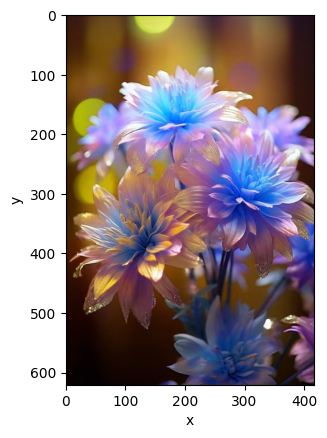

(621, 417, 3)
Processed 2D Model Shape: (258957, 3)
[[27. 32. 51.]
 [19. 24. 44.]
 [17. 23. 45.]
 [19. 25. 51.]
 [18. 23. 52.]]
Number of clusters (k): 6
Max iterations allowed: 300
# of centroids: [[112.793106  64.12117   69.90147 ]
 [212.66953  131.58029  104.272995]
 [ 41.52207   71.58417  111.32956 ]
 [ 90.95233  130.78165  169.13782 ]
 [224.04405  188.11916  200.81183 ]
 [ 12.630251  19.27876   40.24514 ]]


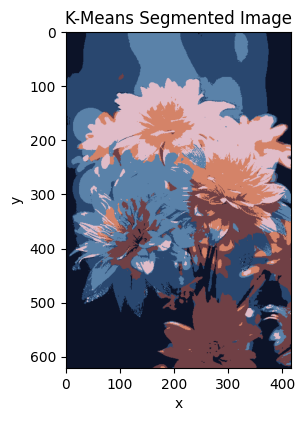

'\n#Original image\nplt.subplot(1, 2, 1)\nplt.imshow(image)\nplt.title("Original Image")\nplt.axis("off")\n\n\n#Segmented Image\nplt.subplot(1, 2, 2)\nplt.imshow(segmented_image)\nplt.title("K-Means Segmented Image")\nplt.axis("off")\n\nplt.show()\n\n\n\n'

In [50]:
################## TEST CASE 1: Flowers ##################################


############# 1. INSERT IMAGE #############
#Read in image
#HOWTO: cv2.imread('image file path')
image = cv2.imread('H:\\CODING\\PROJECT_IST\\flower.jpg')

#View in plot 3D image
plt.imshow(image) #Print plot in matlab of image against x and y dimensions
plt.xlabel("x") #Identified label names for the x dimension
plt.ylabel("y") #Identified label names for the y dimension
plt.show() #ensure plot shows up clearly

############# 2. PROCESS IMAGE from 3D RGB image to 2D Array #############
#Process Image: PROCESS_IMAGE Function
#Wherein it'll be (huge number, 3), aka (each row is a pixel, RGBA channeL)
model = process_imageinto2D(image) #Process image into the 2D model we will use to analyze
print("Processed 2D Model Shape:", model.shape)

print(model[:5]) #Print the first few rows for check


############## 3. CALCULATE K MEANS ALGORITHM ######################################

############## 3A. Initalize KMeans ######################################
#Initalize KMeans calculation that we will work with
#Utilizes __init__ function
kmeans = KMeansClustering(k=6) #Initialize a kmeans setup with X defined number of clusters

############## 3B. Run KMeans Algorithm on image ##########################
#With the Kmeans setup / AKA kmeans object created, find:
#2. Find Labels based on the image dataset in 2D
#KMeans.fit(kmeans object, model of dataset to use)
#model is your data array

#Call labels using the KMEANS INSTANCE of the KMeansClustering class you just created
labels = kmeans.fit(model) #RESULT: Give every data point a label


############## 3C. Turn it "back" to the original shape ##########################

#Create new segmented image where each pixel is replaced by the centroid color
#Reshape this array into a matrix that has this image
centroids = kmeans.centroids

print("Labels: ", labels)
print("Centroids: ", centroids)

segmented_image = centroids[labels]
segmented_image = segmented_image.reshape(image.shape) #reshape to original image shape



############# PRINT segmented image #####################

plt.subplot(1, 2, 2)
plt.imshow(segmented_image.astype(np.uint8)) #convert to uinttype
plt.title("K-Means Segmented Image")
plt.xlabel("x") #Identified label names for the x dimension
plt.ylabel("y") #Identified label names for the y dimension
plt.show()



'''
#Original image
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")


#Segmented Image
plt.subplot(1, 2, 2)
plt.imshow(segmented_image)
plt.title("K-Means Segmented Image")
plt.axis("off")

plt.show()



'''

Raw Image: (408, 612, 3)


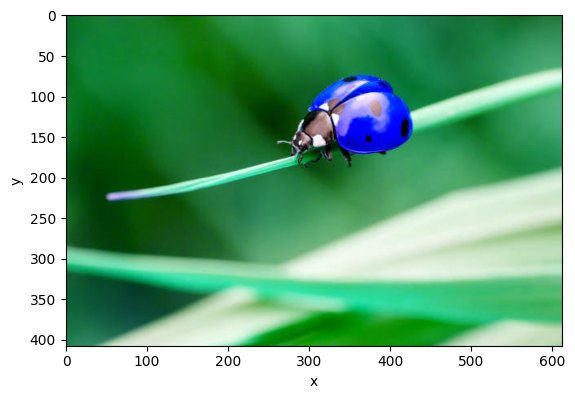

(408, 612, 3)
Processed 2D Model Shape: (249696, 3)
[[ 31. 110.   5.]
 [ 32. 109.   5.]
 [ 34. 109.   6.]
 [ 37. 109.   7.]
 [ 39. 110.   8.]]
Number of clusters (k): 6
Max iterations allowed: 300
# of centroids: [[113.46153  175.78569   66.14875 ]
 [ 60.643585 127.57477   26.595266]
 [169.59947  205.29057  142.94214 ]
 [236.46886   33.600628  15.933839]
 [213.59666  235.0802   213.13144 ]
 [ 19.128412  89.95041   10.089743]]
Labels:  [5 5 5 ... 2 2 2]
Centroids:  [[113.46153  175.78569   66.14875 ]
 [ 60.643585 127.57477   26.595266]
 [169.59947  205.29057  142.94214 ]
 [236.46886   33.600628  15.933839]
 [213.59666  235.0802   213.13144 ]
 [ 19.128412  89.95041   10.089743]]


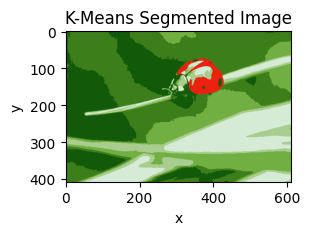

'\n#Original image\nplt.subplot(1, 2, 1)\nplt.imshow(image)\nplt.title("Original Image")\nplt.axis("off")\n\n\n#Segmented Image\nplt.subplot(1, 2, 2)\nplt.imshow(segmented_image)\nplt.title("K-Means Segmented Image")\nplt.axis("off")\n\nplt.show()\n\n\n\n'

In [52]:
################## TEST CASE 2: Ladybug ##################################


############# 1. INSERT IMAGE #############
#Read in image
#HOWTO: cv2.imread('image file path')
image = cv2.imread('H:\\CODING\\PROJECT_IST\\ladybug.jpg')

print("Raw Image:", image.shape)

#View in plot 3D image
plt.imshow(image) #Print plot in matlab of image against x and y dimensions
plt.xlabel("x") #Identified label names for the x dimension
plt.ylabel("y") #Identified label names for the y dimension
plt.show() #ensure plot shows up clearly

############# 2. PROCESS IMAGE from 3D RGB image to 2D Array #############
#Process Image: PROCESS_IMAGE Function
#Wherein it'll be (huge number, 3), aka (each row is a pixel, RGBA channeL)
model = process_imageinto2D(image) #Process image into the 2D model we will use to analyze
print("Processed 2D Model Shape:", model.shape)

print(model[:5]) #Print the first few rows for check


############## 3. CALCULATE K MEANS ALGORITHM ######################################

############## 3A. Initalize KMeans ######################################
#Initalize KMeans calculation that we will work with
#Utilizes __init__ function
kmeans = KMeansClustering(k=6) #Initialize a kmeans setup with X defined number of clusters

############## 3B. Run KMeans Algorithm on image ##########################
#With the Kmeans setup / AKA kmeans object created, find:
#2. Find Labels based on the image dataset in 2D
#KMeans.fit(kmeans object, model of dataset to use)
#model is your data array

#Call labels using the KMEANS INSTANCE of the KMeansClustering class you just created
labels = kmeans.fit(model) #RESULT: Give every data point a label


############## 3C. Turn it "back" to the original shape ##########################

#Create new segmented image where each pixel is replaced by the centroid color
#Reshape this array into a matrix that has this image
centroids = kmeans.centroids

print("Labels: ", labels)
print("Centroids: ", centroids)

segmented_image = centroids[labels]
segmented_image = segmented_image.reshape(image.shape) #reshape to original image shape



############# PRINT segmented image #####################

plt.subplot(1, 2, 2)
plt.imshow(segmented_image.astype(np.uint8)) #convert to uinttype
plt.title("K-Means Segmented Image")
plt.xlabel("x") #Identified label names for the x dimension
plt.ylabel("y") #Identified label names for the y dimension
plt.show()



'''
#Original image
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")


#Segmented Image
plt.subplot(1, 2, 2)
plt.imshow(segmented_image)
plt.title("K-Means Segmented Image")
plt.axis("off")

plt.show()



'''